# Análise UFC

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dados = pd.read_csv('/content/drive/My Drive/Projeto UFC/Dados/ufcdata/data.csv')

In [70]:
dados.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,...,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,...,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,...,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,...,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0

In [71]:
dados.shape

(5144, 145)

In [0]:
dados_aux = pd.DataFrame(dados)

In [0]:
lista_vale_titulo = [True]

In [0]:
dados_aux['title_bout1'] = dados_aux['title_bout'].apply(lambda x: 'Sim' if x in lista_vale_titulo else 'Não' )

In [0]:
del dados_aux['title_bout']

In [76]:
dados_aux.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,...,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,title_bout1
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,...,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,Sim
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,12.800000,...,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0,Sim
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,8.419355,...,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,Não
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,6.000000,...,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,11

## Qual o juiz mais experiente independente de ser luta por cinturão? 
## Herb Dean, pois atuou em 726 lutas

In [77]:
juiz_qtd_lutas = dados_aux['Referee'].value_counts()
juiz_qtd_lutas = pd.DataFrame({'Lutador' : juiz_qtd_lutas.index, 'Quantidade_lutas' : juiz_qtd_lutas.values})
juiz_qtd_lutas


,Lutador,Quantidade_lutas
0,Herb Dean,726
1,John McCarthy,634
2,Mario Yamasaki,391
3,Dan Miragliotta,347
4,Marc Goddard,276
...,...,...
185,Gabe Barahona,1
186,Tom Jones,1
187,Kyle Cardinal,1
188,Lonnie Foster,1


## Qual o juiz mais experiente em lutas por cinturão? 
## John McCarthy, pois atuou em 127 lutas por cinturão


In [78]:
selecao = dados_aux['title_bout1'] == 'Sim'
dados_aux1 = dados_aux[selecao]
dados_aux1.shape


(335, 145)

In [79]:
juiz_qtd_lutas_cinturao = dados_aux1['Referee'].value_counts()
juiz_qtd_lutas_cinturao = pd.DataFrame({'Juiz':juiz_qtd_lutas_cinturao.index,'Quantidade_lutas_cinturao':juiz_qtd_lutas_cinturao.values})
juiz_qtd_lutas_cinturao

,Juiz,Quantidade_lutas_cinturao
0,John McCarthy,127
1,Herb Dean,87
2,Yves Lavigne,22
3,Mario Yamasaki,18
4,Marc Goddard,17
5,Dan Miragliotta,15
6,Steve Mazzagatti,13
7,Josh Rosenthal,6
8,Keith Peterson,5
9,Steve Perceval,3


## Quantas lutas cada lutador participou no corner vermelho?
## Quantas lutas cada lutador participou no corner azul?
## Quantas lutas cada lutador participou no total?
## Quantas lutas cada lutador participou por cinturão?

In [0]:
dados_aux2 = pd.DataFrame(dados)

In [81]:
lutadores_vermelho = dados_aux2['R_fighter'].value_counts() ## lutadores corner vermelho
lutadores_vermelho = pd.DataFrame({'Lutador': lutadores_vermelho.index,'Quantidade_Lutas_Vermelho': lutadores_vermelho.values})
lutadores_vermelho

,Lutador,Quantidade_Lutas_Vermelho
0,Jim Miller,23
1,Donald Cerrone,22
2,Demian Maia,21
3,Michael Bisping,21
4,Diego Sanchez,21
...,...,...
1329,Ulka Sasaki,1
1330,Justin Buchholz,1
1331,Gina Mazany,1
1332,Christina Marks,1


In [82]:
lutadores_azul = dados_aux2['B_fighter'].value_counts() ## lutadores corner azul
lutadores_azul = pd.DataFrame({'Lutador':lutadores_azul.index, 'Quantidade_Lutas_Azul':lutadores_azul.values})
lutadores_azul

,Lutador,Quantidade_Lutas_Azul
0,Jeremy Stephens,19
1,Charles Oliveira,17
2,Nik Lentz,14
3,Rafael Dos Anjos,13
4,Tim Boetsch,13
...,...,...
1769,Yuri Villefort,1
1770,Darrill Schoonover,1
1771,Jorge Patino,1
1772,Sergey Khandozhko,1


In [83]:
lutador_qtd_lutas_cinturao = dados_aux1['R_fighter'].value_counts() ## lutadores por cinturão
lutador_qtd_lutas_cinturao = pd.DataFrame({'Lutador': lutador_qtd_lutas_cinturao.index, 'Quantidade_Lutas_por_Cinturao': lutador_qtd_lutas_cinturao.values})
lutador_qtd_lutas_cinturao

,Lutador,Quantidade_Lutas_por_Cinturao
0,Demetrious Johnson,12
1,Anderson Silva,12
2,Georges St-Pierre,12
3,Jon Jones,11
4,Jose Aldo,10
...,...,...
135,Chad Mendes,1
136,Kamaru Usman,1
137,Jonathan Brookins,1
138,James Wilks,1


## Relatório Geral de Quantidades de Lutas por Lutador


In [84]:
dados_aux2 = pd.merge(lutadores_azul,lutadores_vermelho, how='inner', on='Lutador').merge(lutador_qtd_lutas_cinturao,how='inner',on='Lutador')
dados_aux2['Total_Lutas'] = dados_aux2['Quantidade_Lutas_Azul'] + dados_aux2['Quantidade_Lutas_Vermelho']
dados_aux2.fillna(0, inplace = True)
dados_aux2



,Lutador,Quantidade_Lutas_Azul,Quantidade_Lutas_Vermelho,Quantidade_Lutas_por_Cinturao,Total_Lutas
0,Rafael Dos Anjos,13,14,3,27
1,Dan Henderson,11,7,1,18
2,Tito Ortiz,10,17,6,27
3,Kelvin Gastelum,10,5,1,15
4,Andrei Arlovski,10,19,3,29
...,...,...,...,...,...
118,Martin Bravo,1,2,1,3
119,Steve Jennum,1,2,1,3
120,Dominick Cruz,1,5,4,6
121,James Wilks,1,3,1,4


In [0]:
dados_aux2.to_csv('/content/drive/My Drive/Projeto UFC/Dados/ufcdata/relatorio_ufc.csv', sep=';', index = False)

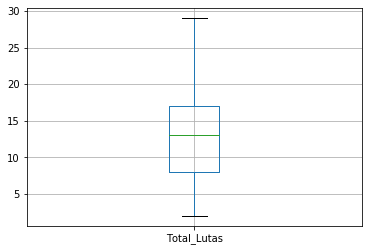

In [89]:
dados_aux2.boxplot(column = ['Total_Lutas'])

In [92]:
q1 = dados_aux2['Total_Lutas'].quantile(.25)
q1

8.0

In [93]:
q3 = dados_aux2['Total_Lutas'].quantile(.75)
q3

17.0

In [94]:
iiq = q3 - q1
iiq

9.0

In [95]:
limite_inferior = q1 - 1.5 * iiq
limite_inferior

-5.5

In [96]:
limite_superior = q3 + 1.5 * iiq
limite_superior

30.5